# EECS 3401 End-to-end Machine Learning Project

### **Authors: Suhayel Uddin, Aidan Dalpe**

**Original Dataset Source: asaniczka (Kaggle username). (2023). Amazon Canada Products 2023. Kaggle. https://www.kaggle.com/datasets/asaniczka/amazon-canada-products-2023-2-1m-products/data**

Markdown cells based on template provided in 'end-to-end-studentsPerformance-RA-eclass.ipynb' by Ruba Al Omari

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve , roc_auc_score, classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC

# 1- Look at the big picture and frame the problem.

### Frame the problem
1. Supervised learning – training examples are labeled.
2. A classification task – predict a binary nominal value (true or false).
3. Batch learning 
    - Small data set
    - No continuous flow of data coming into the system
    - No need to adjust to changing data rapidly

### Look at the big picture

**Task:** Predict whether or not product is bestseller <br><br>
**Big Picture:**<br>
- Predictions will be helpful to company in deciding whether to increase supply of a specific product.
- Predictions will encourage company in creating products that serve as complements to a specific product.

# 2- Load the dataset

Get the dataset and make a copy of dataset.

In [2]:
file_path = "C:/Users/suhay/Documents/Uni/York/EECS3401/Project/archive/amz_ca_total_products_data_processed.csv" # change before running
products = pd.read_csv(file_path, sep=',')
products_copy = products.copy()

## 2.1 Take a quick look at the data structure

**Number of features:**&emsp;11<br>
**Number of examples:**&ensp;2,165,926

In [3]:
products

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,categoryName,isBestSeller,boughtInLastMonth
0,B07CV4L6HX,"Green Leaf WW3D Wonder Extension Cord Winder, ...",https://m.media-amazon.com/images/I/81cRe0AVC4...,https://www.amazon.ca/dp/B07CV4L6HX,4.4,2876,47.69,0.00,Industrial Scientific,False,0
1,B09N1HGY74,8pcs Toilet Seat Bumpers Universal Toilet Repl...,https://m.media-amazon.com/images/I/512CpB-EP5...,https://www.amazon.ca/dp/B09N1HGY74,3.8,55,10.99,0.00,Industrial Scientific,False,100
2,B087P7538J,YaeCCC 19 Pcs Hole Saw Kit 3/4''(19mm)- 6''(15...,https://m.media-amazon.com/images/I/71P+qLFDFc...,https://www.amazon.ca/dp/B087P7538J,4.0,126,25.99,27.99,Industrial Scientific,False,50
3,B0822FF7YQ,LLPT Butyl Putty Tape White 1 Inch x 33Ft Tigh...,https://m.media-amazon.com/images/I/61wfWLZRn-...,https://www.amazon.ca/dp/B0822FF7YQ,4.5,1936,21.99,30.99,Industrial Scientific,False,100
4,B08NTR8NN4,"Lightbeam 16"" Long Stem Deep Fry Thermometer w...",https://m.media-amazon.com/images/I/61qJG-y1He...,https://www.amazon.ca/dp/B08NTR8NN4,4.2,46,18.99,0.00,Industrial Scientific,False,100
...,...,...,...,...,...,...,...,...,...,...,...
2165921,B0B9Y4PJZ2,"Climbing Rope Net for Kids, Net Climbing Cargo...",https://m.media-amazon.com/images/I/81c39KcQWI...,https://www.amazon.ca/dp/B0B9Y4PJZ2,0.0,0,52.99,0.00,Play Sets Playground Equipment,False,0
2165922,B0B9XBN868,YIJU Gymnastic Rings Workout Set with Adjustab...,https://m.media-amazon.com/images/I/61p9ROOs62...,https://www.amazon.ca/dp/B0B9XBN868,0.0,0,15.99,0.00,Play Sets Playground Equipment,False,0
2165923,B0B9T78NVK,Fancyes 2X Heavy Duty Swing Hangers Hardware S...,https://m.media-amazon.com/images/I/51VdGcyjqO...,https://www.amazon.ca/dp/B0B9T78NVK,0.0,0,15.29,0.00,Play Sets Playground Equipment,False,0
2165924,B0B9T41CCT,SM SunniMix 2Pcs Stainless Steel Swing Hangers...,https://m.media-amazon.com/images/I/51o23h9tR9...,https://www.amazon.ca/dp/B0B9T41CCT,0.0,0,21.09,0.00,Play Sets Playground Equipment,False,0


In [4]:
# first 5 rows of 'products'
products.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,categoryName,isBestSeller,boughtInLastMonth
0,B07CV4L6HX,"Green Leaf WW3D Wonder Extension Cord Winder, ...",https://m.media-amazon.com/images/I/81cRe0AVC4...,https://www.amazon.ca/dp/B07CV4L6HX,4.4,2876,47.69,0.00,Industrial Scientific,False,0
1,B09N1HGY74,8pcs Toilet Seat Bumpers Universal Toilet Repl...,https://m.media-amazon.com/images/I/512CpB-EP5...,https://www.amazon.ca/dp/B09N1HGY74,3.8,55,10.99,0.00,Industrial Scientific,False,100
2,B087P7538J,YaeCCC 19 Pcs Hole Saw Kit 3/4''(19mm)- 6''(15...,https://m.media-amazon.com/images/I/71P+qLFDFc...,https://www.amazon.ca/dp/B087P7538J,4.0,126,25.99,27.99,Industrial Scientific,False,50
3,B0822FF7YQ,LLPT Butyl Putty Tape White 1 Inch x 33Ft Tigh...,https://m.media-amazon.com/images/I/61wfWLZRn-...,https://www.amazon.ca/dp/B0822FF7YQ,4.5,1936,21.99,30.99,Industrial Scientific,False,100
4,B08NTR8NN4,"Lightbeam 16"" Long Stem Deep Fry Thermometer w...",https://m.media-amazon.com/images/I/61qJG-y1He...,https://www.amazon.ca/dp/B08NTR8NN4,4.2,46,18.99,0.00,Industrial Scientific,False,100


In [5]:
products.describe()

,stars,reviews,price,listPrice,boughtInLastMonth
count,2.165926e+06,2.165926e+06,2.165926e+06,2.165926e+06,2.165926e+06
mean,2.623661e+00,5.457391e+02,1.112207e+02,4.651383e+00,9.004624e+00
std,2.149905e+00,4.355225e+03,4.976653e+02,2.984392e+01,9.838265e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,1.542000e+01,0.000000e+00,0.000000e+00
50%,4.000000e+00,5.000000e+00,2.742000e+01,0.000000e+00,0.000000e+00
75%,4.500000e+00,1.230000e+02,5.750000e+01,0.000000e+00,0.000000e+00
max,5.000000e+00,8.688650e+05,4.090000e+04,9.999900e+02,2.000000e+04


In [6]:
# feature datatypes can be seen here.
# note: features with dtype=object are actually strings according to original dataset creator
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2165926 entries, 0 to 2165925
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   asin               object 
 1   title              object 
 2   imgUrl             object 
 3   productURL         object 
 4   stars              float64
 5   reviews            int64  
 6   price              float64
 7   listPrice          float64
 8   categoryName       object 
 9   isBestSeller       bool   
 10  boughtInLastMonth  int64  
dtypes: bool(1), float64(3), int64(2), object(5)
memory usage: 167.3+ MB


#### **Any missing values?**

Yes, there are missing values.<br>
One thing to note is that the original creator of the dataset stated that for features: **[ stars, reviews, price, listPrice ]**, if a value wasn't present for the product, then they received a 0 for that feature,<br>
so first, we need to convert those 0's into Nan's to get the true number of missing values, along with the number of missing values for other features.

In [7]:
# first print out number of 0's for each of the four mentioned features
print('Number of 0\'s:')
print('stars:', (products['stars'].values == 0).sum())
print('reviews:', (products['reviews'].values == 0).sum())
print('price:', (products['price'].values == 0).sum())
print('listPrice:', (products['listPrice'].values == 0).sum())

Number of 0's:
stars: 847514
reviews: 846622
price: 177910
listPrice: 1999277


In [8]:
# then convert those 0's to Nans
products['stars'] = products['stars'].replace(0, np.nan)
products['reviews'] = products['reviews'].replace(0, np.nan)
products['price'] = products['price'].replace(0, np.nan)
products['listPrice'] = products['listPrice'].replace(0, np.nan)
products.isna().sum()

asin                       0
title                      6
imgUrl                     0
productURL                 0
stars                 847514
reviews               846622
price                 177910
listPrice            1999277
categoryName               0
isBestSeller               0
boughtInLastMonth          0
dtype: int64

In [9]:
# there are no values with '?'
products.isin(['?']).sum()

asin                 0
title                0
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
listPrice            0
categoryName         0
isBestSeller         0
boughtInLastMonth    0
dtype: int64

#### **Are data scales different?**

If by data scales, it is meant the 4 data measurement scales (Nominal, Ordinal, Interval, Ratio), then yes, we believe so.

asin, title, imgUrl, productURL, categoryName would be nominal.<br>
stars would be Ratio with a range of [0, 5], and would be continuous since it can any floating-point within that range.<br>
reviews, price, listPrice, boughtLastMonth are also Ratio, but have to be at least 0, with reviews and boughtLastMonth being discrete and the others being continuous.<br>
isBestSeller would be binary Nominal in the set {False, True}, or {0, 1}

#### **Categorical data value counts:**
The ones not shown here have unique values (value count = total # of instances)

In [10]:
products['categoryName'].value_counts()

categoryName
Baby                          25664
Luggage  Travel Gear          22990
Handmade Home Décor           19150
Handmade Kitchen  Dining      19074
Perfume  Cologne              18794
                              ...  
Commerical Door Products        751
Smart Home                      732
Blu-ray Players  Recorders      644
STEM                            280
International Food Market       180
Name: count, Length: 266, dtype: int64

In [11]:
products['title'].value_counts()

title
Handmade pillow cover 16x16 inch Boho kelim pillow Retro Pillow Home Decor Ethnic Pillow cover Natural Dye Kilim Cushion Cover High Quality                                            464
Elegant Pillow Lumbar kilim pillow cover 10x20 inch (25x50 cm) Armchair pillow Turkish Kilim pillow cover Chair pillow Oblong Kilim Cushion Cover                                      433
Retro kilim pillow cover 12x20 inch (30x50 cm) Armchair Pillow Knitting Pillow Lumbar Kilim pillow Throw Pillow cover Kilim Cushion Cover Decorative pillow                            330
Bathroom Towel Rack Space Aluminum Bathroom Shelf Wall-Mounted Bathroom Bathroom Towel Rack Shelf Without Drill Bathroom Towel Rack                                                    317
Throw Pillow cover 20x20 inch Retro Pillow Living Room Kilim pillow cover Novelty Home Decor Handmade Kilim cushion cover                                                              302
                                                           

In [12]:
products['imgUrl'].value_counts()

imgUrl
https://m.media-amazon.com/images/I/01RmK+J4pJL._AC_UL80_.gif     1857
https://m.media-amazon.com/images/I/61K931EkvBL._AC_UL320_.jpg     803
https://m.media-amazon.com/images/I/51gTSIICIYL._AC_UL320_.jpg     617
https://m.media-amazon.com/images/I/71nfE0z0jlL._AC_UL320_.jpg     609
https://m.media-amazon.com/images/I/41yRoNIyNwL._AC_UL320_.jpg     428
                                                                  ... 
https://m.media-amazon.com/images/I/41cWUijjGdL._AC_UL320_.jpg       1
https://m.media-amazon.com/images/I/61lsl-dPG-L._AC_UL320_.jpg       1
https://m.media-amazon.com/images/I/51jOV7qGxoL._AC_UL320_.jpg       1
https://m.media-amazon.com/images/I/61OTfjDUJyL._AC_UL320_.jpg       1
https://m.media-amazon.com/images/I/51dJ7HtG7LL._AC_UL320_.jpg       1
Name: count, Length: 1902544, dtype: int64

In [13]:
# target value count
products['isBestSeller'].value_counts()

isBestSeller
False    2158272
True        7654
Name: count, dtype: int64

## 2.2 Create a Test Set

We decided to do the data cleaning and preprocessing on the whole dataset, then split it into training and testing datasets right before training the model.

# 3. Explore and visualize the data to gain insights.


### 3.1 Plot a histogram of the data using hist()

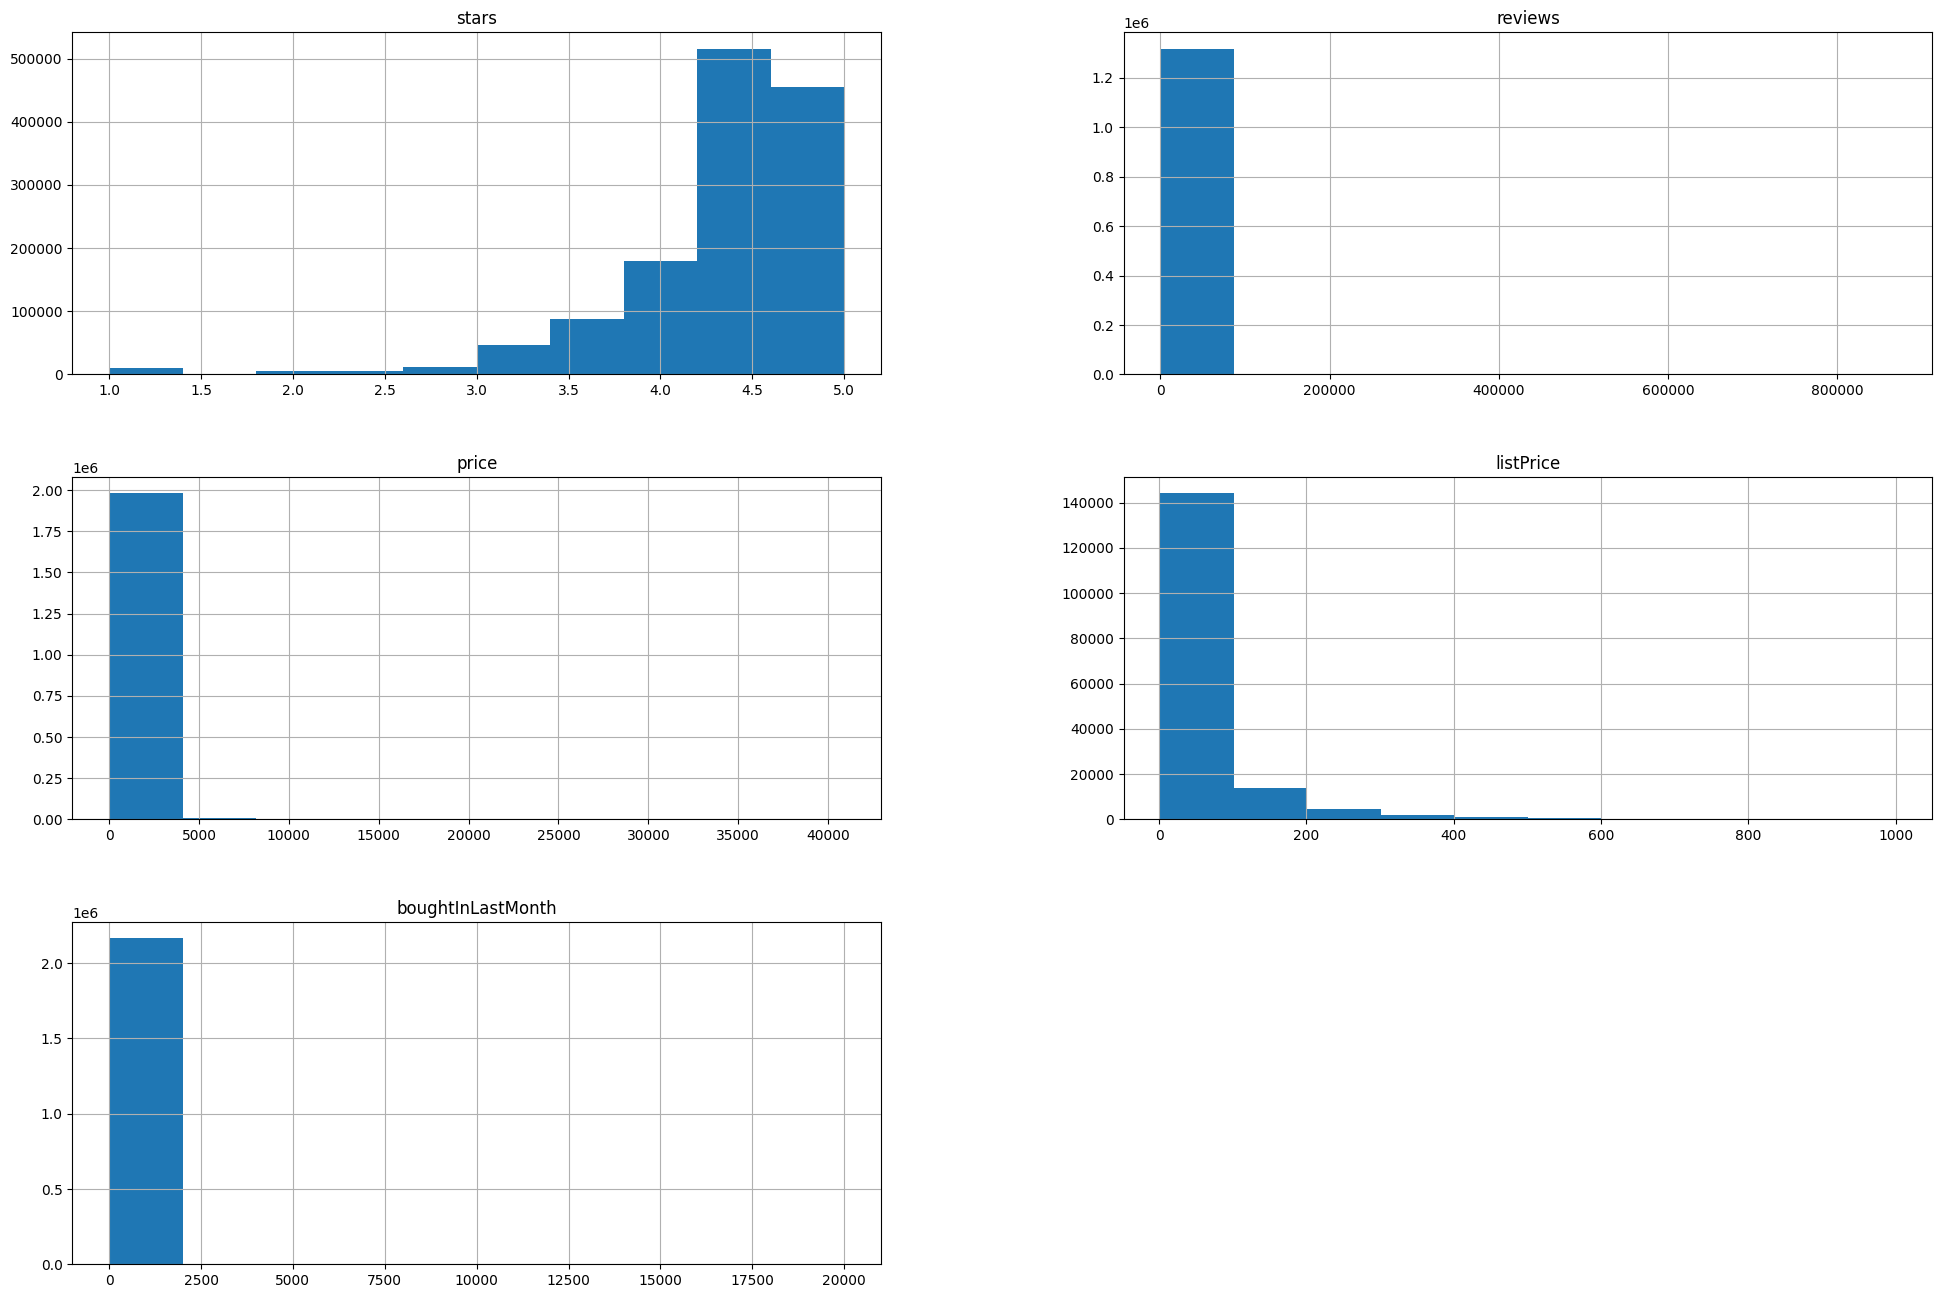

In [14]:
products.hist(figsize=(24, 16))
plt.show()

## 3.2 Look for correlations between the features

In [15]:
# check for correlation between features using standard correlation coefficient (Pearson's r).
prods_corr = products.corr(numeric_only=True)
prods_corr

,stars,reviews,price,listPrice,isBestSeller,boughtInLastMonth
stars,1.000000,0.037046,0.020060,0.029711,0.012604,0.027110
reviews,0.037046,1.000000,-0.013138,-0.012028,0.082038,0.139956
price,0.020060,-0.013138,1.000000,0.985641,-0.008980,-0.016619
listPrice,0.029711,-0.012028,0.985641,1.000000,-0.002681,-0.037228
isBestSeller,0.012604,0.082038,-0.008980,-0.002681,1.000000,0.207904
boughtInLastMonth,0.027110,0.139956,-0.016619,-0.037228,0.207904,1.000000


#### Let's look at correlations with regard to our target

In [16]:
prods_corr['isBestSeller'].sort_values(ascending=False)

isBestSeller         1.000000
boughtInLastMonth    0.207904
reviews              0.082038
stars                0.012604
listPrice           -0.002681
price               -0.008980
Name: isBestSeller, dtype: float64

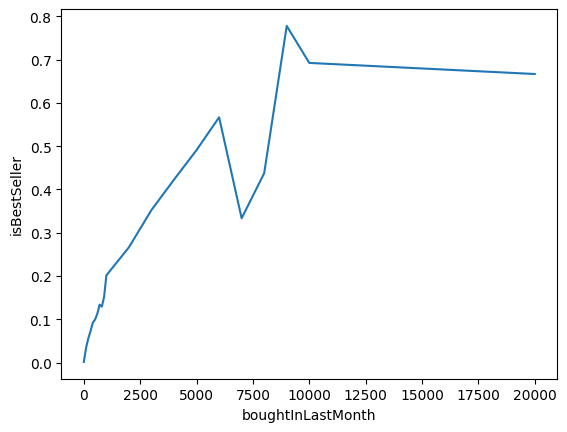

In [17]:
# plot 'boughtInLastMonth' vs. 'isBestSeller'
boughtInLastMonth_vs_isBestSeller = sns.lineplot(x='boughtInLastMonth', y='isBestSeller', data=products, errorbar=None)

Text(0, 0.5, 'isBestSeller')

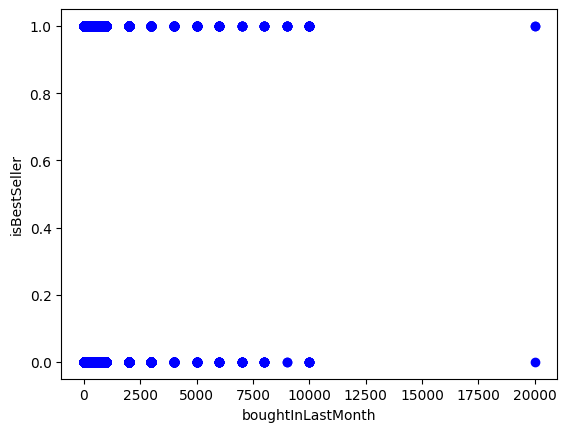

In [18]:
# create scatterplot of 'boughtInLastMonth' and 'isBestSeller'
x = products['boughtInLastMonth']
y = products['isBestSeller']

# plot points
figure, plot = plt.subplots()
plot.scatter(x, y, color='b')
plt.xlabel('boughtInLastMonth')
plt.ylabel('isBestSeller')


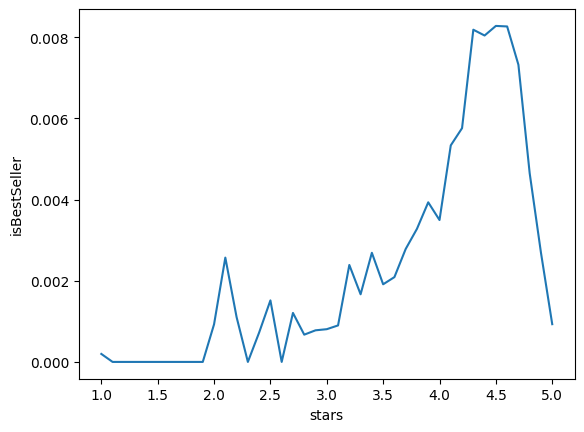

In [19]:
# plot 'stars' vs. 'isBestSeller'
stars_vs_isBestSeller = sns.lineplot(x='stars', y='isBestSeller', data=products, errorbar=None)

# 4. Prepare the data for Machine Learning Algorithms

#### Data cleaning

### 4.1-Check for duplicate rows and remove them if any.

In [19]:
# no duplicates found
products.duplicated().sum()

0

### 4.2-Handle the missing values

In [20]:
# number of missing values in each column
products.isna().sum()

asin                       0
title                      6
imgUrl                     0
productURL                 0
stars                 847514
reviews               846622
price                 177910
listPrice            1999277
categoryName               0
isBestSeller               0
boughtInLastMonth          0
dtype: int64

In [21]:
# we decided to drop instances with Nan 'listPrice' because there were just too many instances with Nan 'listPrice' (close to 2M).
# 'listPrice' is described by original dataset creator as: "Original price of the product before any discounts"
# meanwhile 'price' is described as: "Current price of the product"
products.dropna(subset=['listPrice'], inplace=True)

In [22]:
# dataset after deletion
products

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,categoryName,isBestSeller,boughtInLastMonth
2,B087P7538J,YaeCCC 19 Pcs Hole Saw Kit 3/4''(19mm)- 6''(15...,https://m.media-amazon.com/images/I/71P+qLFDFc...,https://www.amazon.ca/dp/B087P7538J,4.0,126.0,25.99,27.99,Industrial Scientific,False,50
3,B0822FF7YQ,LLPT Butyl Putty Tape White 1 Inch x 33Ft Tigh...,https://m.media-amazon.com/images/I/61wfWLZRn-...,https://www.amazon.ca/dp/B0822FF7YQ,4.5,1936.0,21.99,30.99,Industrial Scientific,False,100
9,B07KMT96S2,"Knife Sharpening Stone,400/1000.2000/5000 Doub...",https://m.media-amazon.com/images/I/61uWVjhezJ...,https://www.amazon.ca/dp/B07KMT96S2,4.4,366.0,29.99,35.99,Industrial Scientific,False,50
13,B08R8T657H,"MIXPOWER Extra Long Torx Bit Socket Set, 3.5-i...",https://m.media-amazon.com/images/I/6154LErNL3...,https://www.amazon.ca/dp/B08R8T657H,4.4,82.0,19.97,21.97,Industrial Scientific,False,0
18,B088M3JCP2,Heat Insulation Silicone Repair Mat with Scale...,https://m.media-amazon.com/images/I/61nzkHmJSZ...,https://www.amazon.ca/dp/B088M3JCP2,4.7,142.0,21.99,25.99,Industrial Scientific,False,50
...,...,...,...,...,...,...,...,...,...,...,...
2159330,B08L52267L,ꕤ Spinning Heavy Duty Fun Swing,https://m.media-amazon.com/images/I/41vq-Ut7BE...,https://www.amazon.ca/dp/B08L52267L,3.2,3.0,40.10,54.99,Play Sets Playground Equipment,False,0
2159420,B0BV7GPLNJ,"Children Steering Wheel, Swing Steering Wheel ...",https://m.media-amazon.com/images/I/61-0kk9U5U...,https://www.amazon.ca/dp/B0BV7GPLNJ,NaN,NaN,21.46,22.84,Play Sets Playground Equipment,False,0
2159436,B09WZRDX1G,Gicov Swing Set Replacement Tarp Kids Playgrou...,https://m.media-amazon.com/images/I/51UkZoGa0S...,https://www.amazon.ca/dp/B09WZRDX1G,5.0,2.0,39.85,42.99,Play Sets Playground Equipment,False,0
2159454,B08ZCNHY47,"Costzon Toddler Swing Set, Outdoor Metal Swing...",https://m.media-amazon.com/images/I/61yIEZJgIW...,https://www.amazon.ca/dp/B08ZCNHY47,4.2,85.0,99.99,109.99,Play Sets Playground Equipment,False,0


In [23]:
# Nan count after deletion
products.isna().sum()

asin                    0
title                   0
imgUrl                  0
productURL              0
stars                8916
reviews              8916
price                   0
listPrice               0
categoryName            0
isBestSeller            0
boughtInLastMonth       0
dtype: int64

In [24]:
# correlation to target after deletion
# correlation didn't change much, deleting those instances didn't have noticable impact on dataset and correlation
prods_corr = products.corr(numeric_only=True)
prods_corr['isBestSeller'].sort_values(ascending=False)

isBestSeller         1.000000
boughtInLastMonth    0.229124
reviews              0.113755
stars                0.024501
listPrice           -0.002681
price               -0.004646
Name: isBestSeller, dtype: float64

In [25]:
# we decided to drop instances with Nan 'stars' to ensure there were no missing values for any numeric attributes
# we didn't feel that filling these missing these values with the mean or median would've made sense as there are different kinds of products in this dataset
# and products within a category may have a 
products.dropna(subset=['stars'], inplace=True)

In [26]:
# dataset after Nan 'stars' instance deletions
products

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,categoryName,isBestSeller,boughtInLastMonth
2,B087P7538J,YaeCCC 19 Pcs Hole Saw Kit 3/4''(19mm)- 6''(15...,https://m.media-amazon.com/images/I/71P+qLFDFc...,https://www.amazon.ca/dp/B087P7538J,4.0,126.0,25.99,27.99,Industrial Scientific,False,50
3,B0822FF7YQ,LLPT Butyl Putty Tape White 1 Inch x 33Ft Tigh...,https://m.media-amazon.com/images/I/61wfWLZRn-...,https://www.amazon.ca/dp/B0822FF7YQ,4.5,1936.0,21.99,30.99,Industrial Scientific,False,100
9,B07KMT96S2,"Knife Sharpening Stone,400/1000.2000/5000 Doub...",https://m.media-amazon.com/images/I/61uWVjhezJ...,https://www.amazon.ca/dp/B07KMT96S2,4.4,366.0,29.99,35.99,Industrial Scientific,False,50
13,B08R8T657H,"MIXPOWER Extra Long Torx Bit Socket Set, 3.5-i...",https://m.media-amazon.com/images/I/6154LErNL3...,https://www.amazon.ca/dp/B08R8T657H,4.4,82.0,19.97,21.97,Industrial Scientific,False,0
18,B088M3JCP2,Heat Insulation Silicone Repair Mat with Scale...,https://m.media-amazon.com/images/I/61nzkHmJSZ...,https://www.amazon.ca/dp/B088M3JCP2,4.7,142.0,21.99,25.99,Industrial Scientific,False,50
...,...,...,...,...,...,...,...,...,...,...,...
2159314,B0BDRFZZ19,Jolly Jumper The Original with Super Stand & -...,https://m.media-amazon.com/images/I/51JfYdYdxV...,https://www.amazon.ca/dp/B0BDRFZZ19,4.7,3734.0,232.61,264.98,Play Sets Playground Equipment,False,0
2159330,B08L52267L,ꕤ Spinning Heavy Duty Fun Swing,https://m.media-amazon.com/images/I/41vq-Ut7BE...,https://www.amazon.ca/dp/B08L52267L,3.2,3.0,40.10,54.99,Play Sets Playground Equipment,False,0
2159436,B09WZRDX1G,Gicov Swing Set Replacement Tarp Kids Playgrou...,https://m.media-amazon.com/images/I/51UkZoGa0S...,https://www.amazon.ca/dp/B09WZRDX1G,5.0,2.0,39.85,42.99,Play Sets Playground Equipment,False,0
2159454,B08ZCNHY47,"Costzon Toddler Swing Set, Outdoor Metal Swing...",https://m.media-amazon.com/images/I/61yIEZJgIW...,https://www.amazon.ca/dp/B08ZCNHY47,4.2,85.0,99.99,109.99,Play Sets Playground Equipment,False,0


In [27]:
# Nan count after deletion
# deleting the instances with null 'stars' also deleted instances with null 'reviews' 
products.isna().sum()

asin                 0
title                0
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
listPrice            0
categoryName         0
isBestSeller         0
boughtInLastMonth    0
dtype: int64

In [28]:
# correlation to target after null 'stars' and 'reviews' deletion
# correlation still didn't change much
prods_corr = products.corr(numeric_only=True)
prods_corr['isBestSeller'].sort_values(ascending=False)

isBestSeller         1.000000
boughtInLastMonth    0.228810
reviews              0.113755
stars                0.024501
listPrice           -0.003071
price               -0.005140
Name: isBestSeller, dtype: float64

### 4.2.1-Handling Text and Categorical Attributes

We decided to drop some features:<br>
asin - string id for product<br>
imgUrl - image url of product<br>
productURL - webpage url of product<br>
title - title/name of product<br><br>
We decided to drop imgUrl and productURL as we felt that they wouldn't help with our task, and we dropped asin since we could just use indices to access/identify a specific instance.<br>
We originally didn't want to drop the title feature, but unfortunately, there were just too many unique values, which caused the array from applying the preprocessing pipeline on the dataset<br>
to be too large for memory since too many categorical columns had to be encoded then.

In [29]:
products.drop(labels=['asin'], axis=1, inplace=True)
products.drop(labels=['imgUrl'], axis=1, inplace=True)
products.drop(labels=['productURL'], axis=1, inplace=True)
products.drop(labels=['title'], axis=1, inplace=True)

In [30]:
# after feature deletions
products

,stars,reviews,price,listPrice,categoryName,isBestSeller,boughtInLastMonth
2,4.0,126.0,25.99,27.99,Industrial Scientific,False,50
3,4.5,1936.0,21.99,30.99,Industrial Scientific,False,100
9,4.4,366.0,29.99,35.99,Industrial Scientific,False,50
13,4.4,82.0,19.97,21.97,Industrial Scientific,False,0
18,4.7,142.0,21.99,25.99,Industrial Scientific,False,50
...,...,...,...,...,...,...,...
2159314,4.7,3734.0,232.61,264.98,Play Sets Playground Equipment,False,0
2159330,3.2,3.0,40.10,54.99,Play Sets Playground Equipment,False,0
2159436,5.0,2.0,39.85,42.99,Play Sets Playground Equipment,False,0
2159454,4.2,85.0,99.99,109.99,Play Sets Playground Equipment,False,0


In [31]:
# after feature deletions
products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157733 entries, 2 to 2159501
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   stars              157733 non-null  float64
 1   reviews            157733 non-null  float64
 2   price              157733 non-null  float64
 3   listPrice          157733 non-null  float64
 4   categoryName       157733 non-null  object 
 5   isBestSeller       157733 non-null  bool   
 6   boughtInLastMonth  157733 non-null  int64  
dtypes: bool(1), float64(4), int64(1), object(1)
memory usage: 8.6+ MB


In [32]:
products['categoryName'].value_counts()

categoryName
Electronics                           3952
Beauty                                3787
Luggage  Travel Gear                  2977
Women                                 2821
Men                                   2314
                                      ... 
Handmade Beauty  Grooming Products       2
Blu-ray Players  Recorders               2
Scaffolding Equipment                    2
Toy Gardening Equipment                  1
Handmade Toys  Games                     1
Name: count, Length: 260, dtype: int64

In [33]:
products['isBestSeller'].value_counts()

isBestSeller
False    155579
True       2154
Name: count, dtype: int64

#### We will now create the pipeline which will also scale the features and perform encoding.

### 4.3. Create a pipeline that will:

1. Scale the numerical columns using StandardScaler. Do not scale the target

2. Encode the categorical columns using OneHotEncoder

Since there are no more missing numerical/categorical column values, we don't need to use SimpleImputer

In [34]:
# based on original code by Ruba Al Omari

# Create the cat and num columns
# Get a list of column names from the 'students' DataFrame that are of numerical data types.
# Get a list of column names from the 'students' DataFrame that are not of numerical data types.

num_cols = products.select_dtypes(include='number').columns.to_list()
cat_cols = products.select_dtypes(exclude='number').columns.to_list()


# Exclude the target from categorical columns
cat_cols.remove("isBestSeller")

# Create pipelines for numeric and categorical columns
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder(sparse_output=False))

# Use ColumnTransformer to set the estimators and transformations

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols), ('cat', cat_pipeline, cat_cols)], remainder='passthrough')

In [35]:
num_cols

['stars', 'reviews', 'price', 'listPrice', 'boughtInLastMonth']

In [36]:
cat_cols

['categoryName']

In [37]:
# Show the pipeline
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['stars', 'reviews', 'price', 'listPrice',
                                  'boughtInLastMonth']),
                                ('cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['categoryName'])])

In [38]:
# based on original code by Ruba Al Omari

# Apply the preprocessing pipeline on the dataset
prods_prepared = preprocessing.fit_transform(products)

# Scikit-learn strips the column headers, so just add them back on afterward.
prods_feats = preprocessing.get_feature_names_out()
prods_prepared = pd.DataFrame(data=prods_prepared, columns=prods_feats)

prods_prepared

,num__stars,num__reviews,num__price,num__listPrice,num__boughtInLastMonth,cat__categoryName_3D Printing Scanning,cat__categoryName_Abrasive Finishing Products,"cat__categoryName_Action Figures, Maquettes Busts",cat__categoryName_Action Sports,cat__categoryName_Air Freshener Supplies,...,cat__categoryName_Window Hardware,cat__categoryName_Women,cat__categoryName_Women's Accessories,cat__categoryName_Women's Clothing,cat__categoryName_Women's Handbags,cat__categoryName_Women's Health Family Planning,cat__categoryName_Women's Jewelry,cat__categoryName_Women's Shoes,cat__categoryName_Women's Watches,remainder__isBestSeller
0,-0.542589,-0.177991,-0.322384,-0.363368,0.072706,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.395711,0.036829,-0.374442,-0.330172,0.298818,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.208051,-0.149506,-0.270325,-0.274846,0.072706,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.208051,-0.183213,-0.400731,-0.429981,-0.153406,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.771030,-0.176092,-0.374442,-0.385498,0.072706,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157728,0.771030,0.250224,2.366690,2.258984,-0.153406,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
157729,-2.043868,-0.192589,-0.138748,-0.064606,-0.153406,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
157730,1.334010,-0.192708,-0.142001,-0.197389,-0.153406,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
157731,-0.167269,-0.182857,0.640696,0.543982,-0.153406,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
prods_prepared.columns

Index(['num__stars', 'num__reviews', 'num__price', 'num__listPrice',
       'num__boughtInLastMonth', 'cat__categoryName_3D Printing  Scanning',
       'cat__categoryName_Abrasive  Finishing Products',
       'cat__categoryName_Action Figures, Maquettes  Busts',
       'cat__categoryName_Action Sports',
       'cat__categoryName_Air Freshener Supplies',
       ...
       'cat__categoryName_Window Hardware', 'cat__categoryName_Women',
       'cat__categoryName_Women's Accessories',
       'cat__categoryName_Women's Clothing',
       'cat__categoryName_Women's Handbags',
       'cat__categoryName_Women's Health  Family Planning',
       'cat__categoryName_Women's Jewelry', 'cat__categoryName_Women's Shoes',
       'cat__categoryName_Women's Watches', 'remainder__isBestSeller'],
      dtype='object', length=266)

# 5. Select and train a model

## 5.1 Split the dataset into a training dataset (80%) and testing dataset.

In [40]:
# based on original code by Ruba Al Omari

x = prods_prepared.drop(['remainder__isBestSeller'], axis=1)
y = prods_prepared['remainder__isBestSeller']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(126186, 265) (126186,) (31547, 265) (31547,)


### 5.2 Train a SVM model (SVC) to predict whether product is best seller or not

In [41]:
model_svm = SVC(kernel='rbf', C=1, gamma=1)
model_svm.fit(x_train, y_train)

SVC(C=1, gamma=1)

### 5.2.1 Test SVM model on x_test and show the classification report on the y_test and y_predict_svm

In [44]:
# test/predict
y_predict_svm = model_svm.predict(x_test)

# classification report
print(f'classification_report for C = 1')
print(classification_report(y_test, y_predict_svm))

classification_report for C = 1
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     31136
         1.0       0.62      0.03      0.06       411

    accuracy                           0.99     31547
   macro avg       0.80      0.52      0.53     31547
weighted avg       0.98      0.99      0.98     31547



### 5.2.2 Display confusion matrix of SVM test results

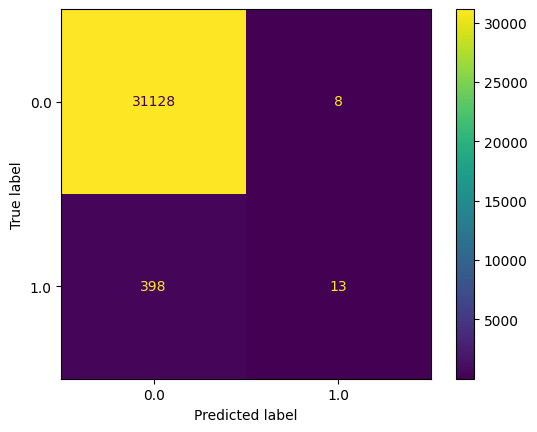

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_svm)

### 5.3 Train a Decision Tree model to predict whether product is best seller

In [47]:
# import required libraries
from sklearn import tree

In [48]:
# create decision tree classifier
model_dec_tree = tree.DecisionTreeClassifier()

# train the model
model_dec_tree.fit(x_train, y_train)

DecisionTreeClassifier()

### 5.3.1 Test Decision tree model on x_test and show the classification report on the y_test and y_predict_dec_tree

In [50]:
# test/predict
y_predict_dec_tree = model_dec_tree.predict(x_test)

# classification report
print(classification_report(y_test, y_predict_dec_tree))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     31136
         1.0       0.12      0.14      0.13       411

    accuracy                           0.98     31547
   macro avg       0.56      0.56      0.56     31547
weighted avg       0.98      0.98      0.98     31547



### 5.3.2 Display confusion matrix of Decision Tree test results

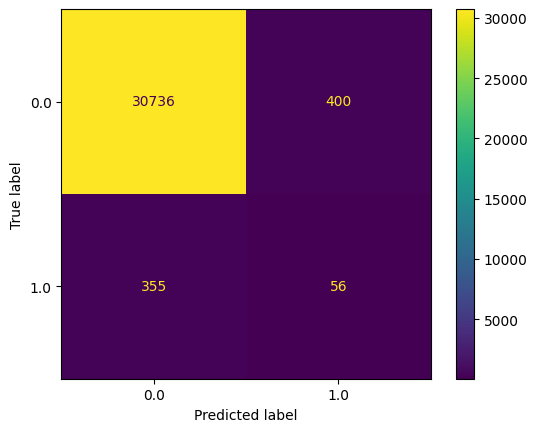

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_dec_tree)

### 5.4 Train a (Gaussian) Naive Bayes model to predict whether product is best seller

In [52]:
# import required library
from sklearn.naive_bayes import GaussianNB

In [53]:
# create gaussian naive bayes classifier
model_gaus_nb = GaussianNB()

In [54]:
# train the model
model_gaus_nb.fit(x_train, y_train)

GaussianNB()

### 5.4.1 Test Naive Bayes model on x_test and show the classification report on the y_test and y_predict_gaus_nb

In [55]:
# test/predict
y_predict_gaus_nb = model_gaus_nb.predict(x_test)

# classification report
print(classification_report(y_test, y_predict_gaus_nb))

              precision    recall  f1-score   support

         0.0       1.00      0.21      0.35     31136
         1.0       0.02      0.99      0.03       411

    accuracy                           0.22     31547
   macro avg       0.51      0.60      0.19     31547
weighted avg       0.99      0.22      0.34     31547



### 5.4.2 Display confusion matrix of (Gaussian) Naive Bayes test results

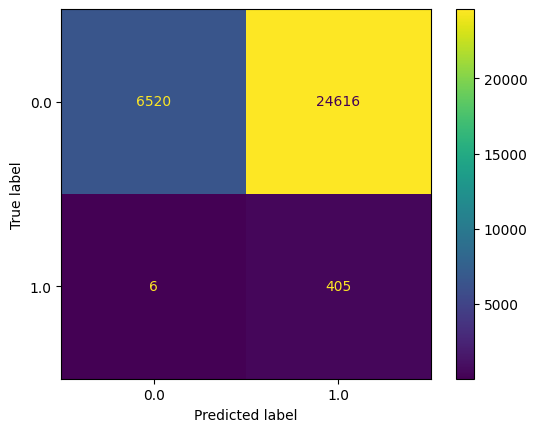

In [56]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_gaus_nb)

Out of these 3 models, SVM seems to be the best, so now we fine tune that model.

### 6 - Fine tune our SVM model

Use GridSearchCV to find the best value of gamma and C for the SVM model

### 6.1 - Split the dataset into 60% training, 20% validation, and 20% testing

In [41]:
# code author Ruba Al Omari

X_train, X_validation_test, Y_train, Y_validation_test = train_test_split(x, y, test_size=0.4, random_state=42)

X_validation, X_test, Y_validation, Y_test = train_test_split(X_validation_test, Y_validation_test, test_size=0.5, random_state=42)

print(X_train.shape, Y_train.shape, X_validation.shape, Y_validation.shape, X_test.shape, Y_test.shape)

(94639, 265) (94639,) (31547, 265) (31547,) (31547, 265) (31547,)


### 6.2 - Pass the following hyperparameters for the GridSearchCV to find the best ones and check the svm winner parameters

In [42]:
# import required library
from sklearn.model_selection import GridSearchCV

In [43]:
# we decided to use just the first 30K instances of X_train and Y_train for training since using the full training set was taking too long

# code author luisguiserrano

svm_params = {'kernel': ['rbf'], 'C': [0.01, 0.1, 1 , 10], 'gamma': [0.01, 1, 10]}

model_svm_new = SVC()
svm_gs = GridSearchCV(estimator = model_svm_new, param_grid = svm_params)
svm_gs.fit(X_train.iloc[:30000], Y_train.iloc[:30000])

svm_winner = svm_gs.best_estimator_
svm_winner.score(X_validation, Y_validation)

0.9867499286778457

In [44]:
svm_winner

SVC(C=1, gamma=10)

### 6.3 Test the new SVM model on X_test and show the classification report on the Y_test and Y_predict_svm_winner

In [45]:
# test/predict
Y_predict_svm_winner = svm_winner.predict(X_test)

# classification report
print(classification_report(Y_test, Y_predict_svm_winner))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     31133
         1.0       0.40      0.00      0.01       414

    accuracy                           0.99     31547
   macro avg       0.69      0.50      0.50     31547
weighted avg       0.98      0.99      0.98     31547



### 6.4 Display graphs of the model

### 6.4.1 Display confusion matrix of SVM test results

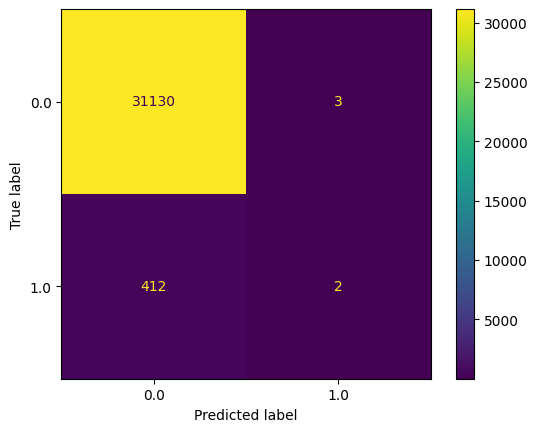

In [46]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_predict_svm_winner)

### 6.4.2 Point Plot

In [54]:
from sklearn.metrics import RocCurveDisplay

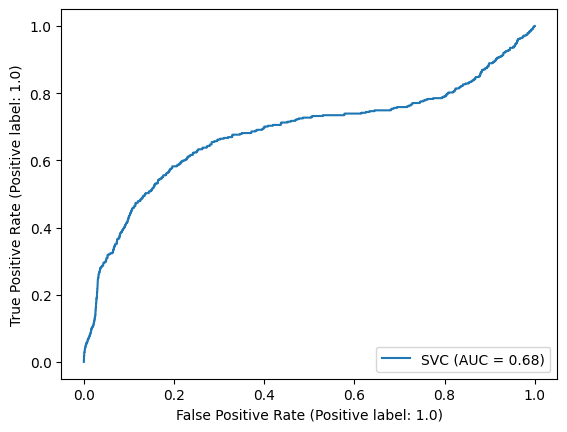

In [56]:
svc_display = RocCurveDisplay.from_estimator(svm_winner, X_test, Y_test)

### 6.4.1 Precision Recall Display

In [57]:
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)

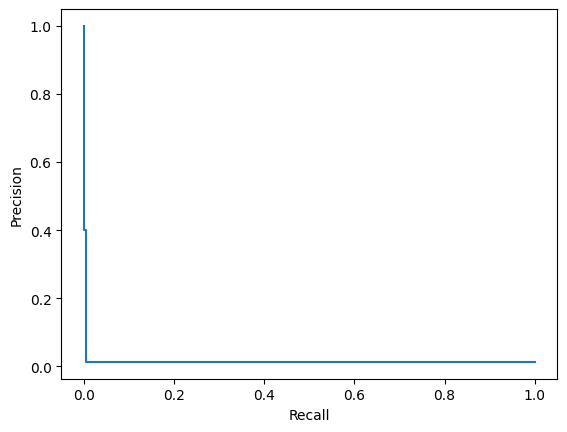

In [58]:
# from: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.PrecisionRecallDisplay.html
precision, recall, _ = precision_recall_curve(Y_test, Y_predict_svm_winner)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()